In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
file = 'dane_z_badan_dzwignicy.csv'
df = pd.read_csv(file)
df.head()

,Nr. Pomiaru,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa]
0,1,11/4/2019,5,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.0
1,2,11/4/2019,8,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.0
2,3,11/4/2019,15,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.0
3,4,11/5/2019,5,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.1752,7.00,1.94,8.00,999.5
4,5,11/5/2019,8,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.1752,7.00,1.94,8.00,999.5


In [212]:
print(df.columns)

Index(['Nr. Pomiaru', 'Data', 'Ciężar ładunku [T]', 'Długość wysięgnika [m]',
       'Odległość od osi [m]', 'Wysokość podnoszenia [m]',
       'Maksymalne, chwilowe zużycie ON [l/h]', 'Dzienne zużycie ON [l/8h]',
       'Cena hurtowa ON 1000l [PLN]',
       'Maksymalne, chwilowe zużycie energii elektrycznej [kW]',
       'Dzienne zużycie energii elektrycznej [kW/8h]',
       'Cena energii elektrycznej [kWh]', 'Koszt dzienny [PLN]',
       'Prędkość wiatru [km/h]', 'Prędkość wiatru [m/s]', 'Temperatura [C]',
       'Ciśnienie [hPa]'],
      dtype='object')


In [213]:
# zamieńmy wartośc Data na obiekt datetime (dane są w formacie DD-MM-YYYY)
df['Data'] = pd.to_datetime(df['Data'])
df.head()

,Nr. Pomiaru,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa]
0,1,2019-11-04,5,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.0
1,2,2019-11-04,8,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.0
2,3,2019-11-04,15,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.0
3,4,2019-11-05,5,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.1752,7.00,1.94,8.00,999.5
4,5,2019-11-05,8,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.1752,7.00,1.94,8.00,999.5


In [214]:
missing_data = pd.DataFrame(df.isnull().sum(), columns=['nans'])
missing_data['percent'] = round(missing_data['nans'] / df.shape[0] * 100, 2)
missing_data = missing_data[missing_data['nans'] > 0]
missing_data.columns.name = 'column'
missing_data

column,nans,percent
"Maksymalne, chwilowe zużycie ON [l/h]",831,87.66
Dzienne zużycie ON [l/8h],831,87.66
Cena hurtowa ON 1000l [PLN],861,90.82
"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",117,12.34
Dzienne zużycie energii elektrycznej [kW/8h],117,12.34
Cena energii elektrycznej [kWh],117,12.34
Koszt dzienny [PLN],30,3.16


Dane z testów modernizowanego układu zasilania elektrycznego w dźwignicy żurawia zastosowanego jako alternatywy dla silnika Diesla w kontekście parametrów dźwignicy, kosztów zużycia energii elektrycznej i paliw, podczas transportu pionowego ładunków w różnych warunkach pogodowych.

Braki na temat danych o zużyciu energii elektrycznej i zużyciu ON sumują się do 100% zbioru i wynika to z tego, że dane te porównują 2 rodzaje silników wykorzystywane przy pracy dźwignicy

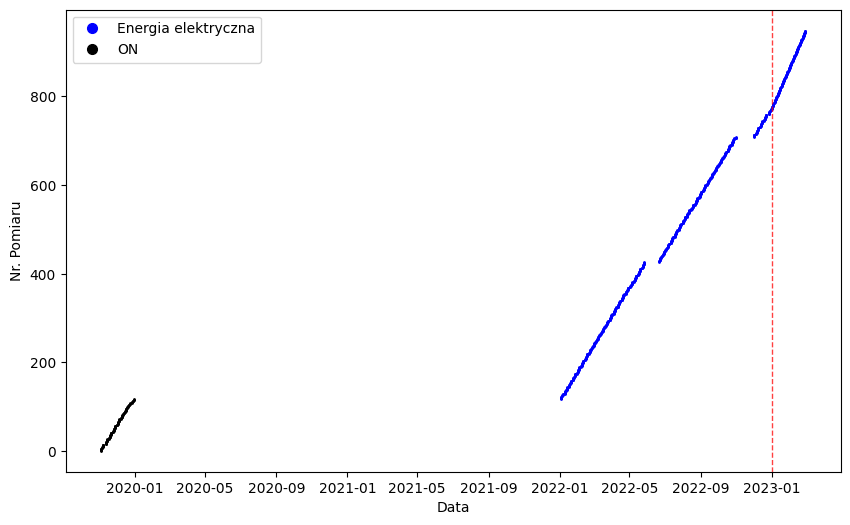

In [215]:
plt.figure(figsize=(10, 6))
plt.plot(df['Data'][df['Dzienne zużycie ON [l/8h]'].isnull()], df['Nr. Pomiaru'][df['Dzienne zużycie ON [l/8h]'].isnull()], 'o', markersize=1, color='blue', label='Energia elektryczna')
plt.plot(df['Data'][df['Dzienne zużycie energii elektrycznej [kW/8h]'].isnull()], df['Nr. Pomiaru'][df['Dzienne zużycie energii elektrycznej [kW/8h]'].isnull()], 'o', markersize=1, color='black', label='ON')
plt.xlabel('Data')
plt.ylabel('Nr. Pomiaru')
plt.legend(markerscale=7)
plt.axvline(pd.Timestamp('2023-01-01'), color='red', linestyle='--', linewidth=1, label='2023', alpha=0.75)

Dane układają się w 4 widoczne okresy czasowe w których prowadzone były badania. Zauważono również, że linia po 1 stycznia 2023 roku staje się gładsza, co oznacza, że dane były zbierane z większą częstotliwością.

Różnice dniowe następujących po sobie danych:

In [216]:
#tabela różnic dnioowych
df_diff = df['Data'].diff().dt.days.value_counts().reset_index()
df_diff.columns = ['diff', 'count']
df_diff = df_diff.sort_values(by='diff')
df_diff

,diff,count
0,0.0,632
1,1.0,257
4,2.0,3
2,3.0,49
3,4.0,3
6,25.0,1
7,31.0,1
5,734.0,1


Różnica o wartości 0 wynika z faktu, że dla każdego dnia zgromadzone zostały 3 pomiary i jest to różnica dni między wartościami przypadającymi na ten sam dzień.

Przyjęto, że różnica mniejsza lub równa 4 dni wynika z dni w których pomiary nie były prowadzone z powodów losowych lub dni wolnych (święta, weekendy), natomiast wartości 25 31 oznaczają odstepy w okresach w trakcie których badano układ zasilania elektrycznego a różnica 734 dni to okres między badaniami efektywności ON a energii elektrycznej.

In [168]:
#różnice dniowe po 2023-01-01
df_diff = df[df['Data'] > '2023-01-01']['Data'].diff().dt.days.value_counts().reset_index()
df_diff.columns = ['diff', 'count']
df_diff = df_diff.sort_values(by='diff')
df_diff

,diff,count
0,0.0,116
1,1.0,57


Dla danych od 1 stycznia 2023 nie występują wartości większe niż 1, czyli te dane były zbierane codziennie.

In [169]:
#podzielmy dane według różnic dniowych na okresy
df['okres'] = (df['Data'].diff().dt.days > 4).cumsum()

Rozkład poszczególnych dni tygodnia w różnych okresach:

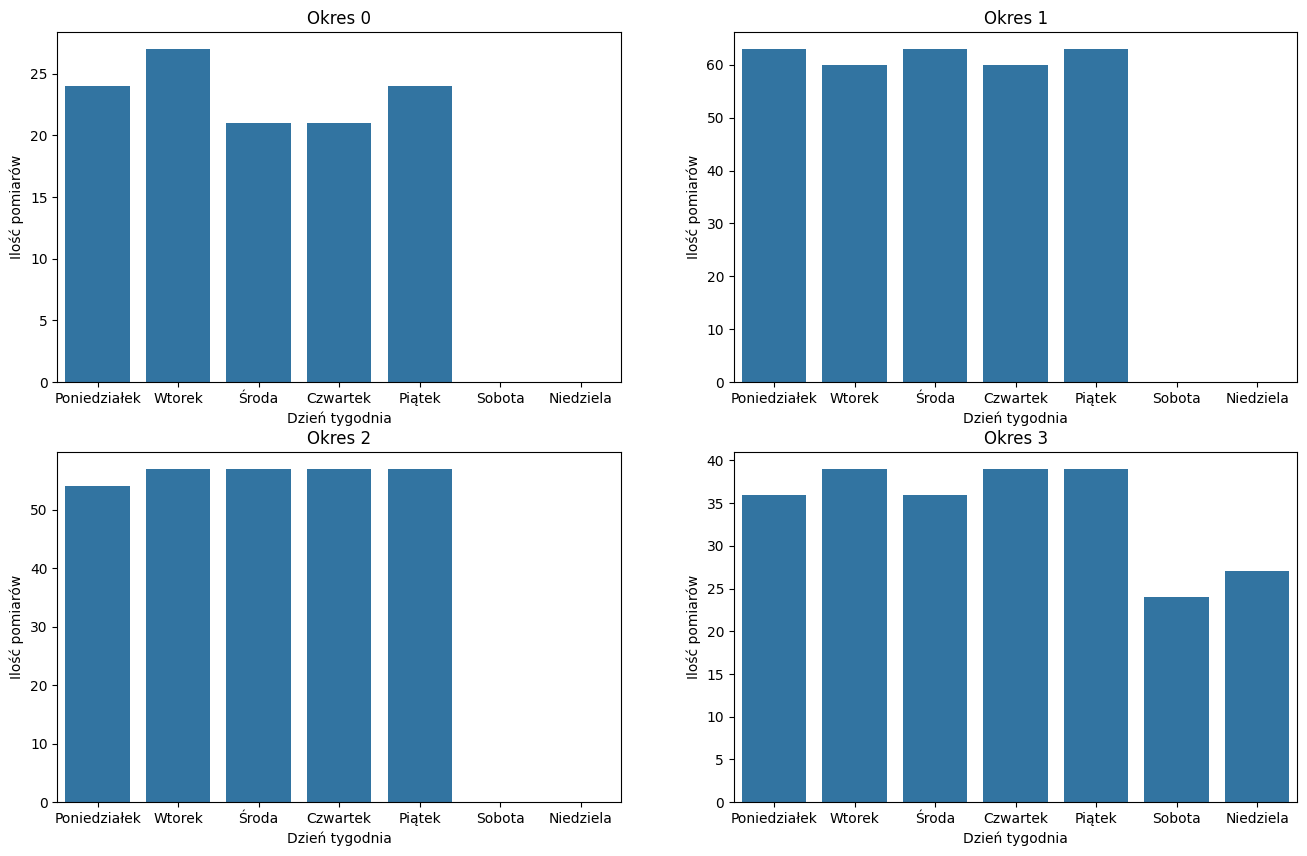

In [170]:
df['dzien_tygodnia'] = df['Data'].dt.dayofweek
df['dzien_tygodnia'] = df['dzien_tygodnia'].map({0: 'Poniedziałek', 1: 'Wtorek', 2: 'Środa', 3: 'Czwartek', 4: 'Piątek', 5: 'Sobota', 6: 'Niedziela'})
df['dzien_tygodnia'] = pd.Categorical(df['dzien_tygodnia'], categories=['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela'], ordered=True)

fig, ax = plt.subplots(2, 2, figsize=(16, 10))

for i, okres in enumerate(df['okres'].unique()):
    sns.countplot(data=df[df['okres'] == okres], x='dzien_tygodnia', ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(f'Okres {okres}')
    ax[i // 2, i % 2].set_xlabel('Dzień tygodnia')
    ax[i // 2, i % 2].set_ylabel('Ilość pomiarów')

Zauważono, że jedynie w ostatnim okresie występują dane dla sobót i niedziel, jest ich jednak proporcjonalnie mniej względem innych dni tygodnia ze względu na to, że ostatni okres zawiera w sobie również końcówkę roku 2022 kiedy dane nie były zbierane w dni wolne od pracy. 

In [171]:
import holidays

pl_holidays_dates = pd.Series([pd.Timestamp(date) for date in holidays.Poland(years=range(2018, 2024)).keys()])

for okres in df['okres'].unique():
    data = df[df['okres'] == okres]
    start_date = data['Data'].min()
    end_date = data['Data'].max()
    date_range = pd.date_range(start=start_date, end=end_date)
    missing_dates = date_range.difference(data['Data'])
    missing_dates = missing_dates[missing_dates.dayofweek != 5]
    missing_dates = missing_dates[missing_dates.dayofweek != 6]
    missing_dates = missing_dates[~missing_dates.isin(pl_holidays_dates)]
    print(f'Okres: {okres}, ilość brakujących dni: {len(missing_dates)}, brakujące dni: {missing_dates}')

Okres: 0, ilość brakujących dni: 0, brakujące dni: DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Okres: 1, ilość brakujących dni: 0, brakujące dni: DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Okres: 2, ilość brakujących dni: 0, brakujące dni: DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Okres: 3, ilość brakujących dni: 0, brakujące dni: DatetimeIndex([], dtype='datetime64[ns]', freq=None)


Można stwierdzić, że dla każdego z okresów obejmując przedział od pierwszego do ostatniego dnia pomariów nie ma brakujących dni, które nie byłyby dniami wolnymi od pracy. Sytuacja ta zmienia się od 1 stycznia 2023 roku i dane były wtedy zbierane codziennie.

Niestety nie ma informacji na temat dlaczego od 2023 roku dane były zbierane codziennie, czy zostało to w jakiś sposób zautomatyzowane, dane zostały wypełnione w jakiś sposób lub czy też prace były prowadzone w dni ustawowo wolne od pracy.

Text(0, 0.5, 'Cena hurtowa ON 1000l [PLN]')

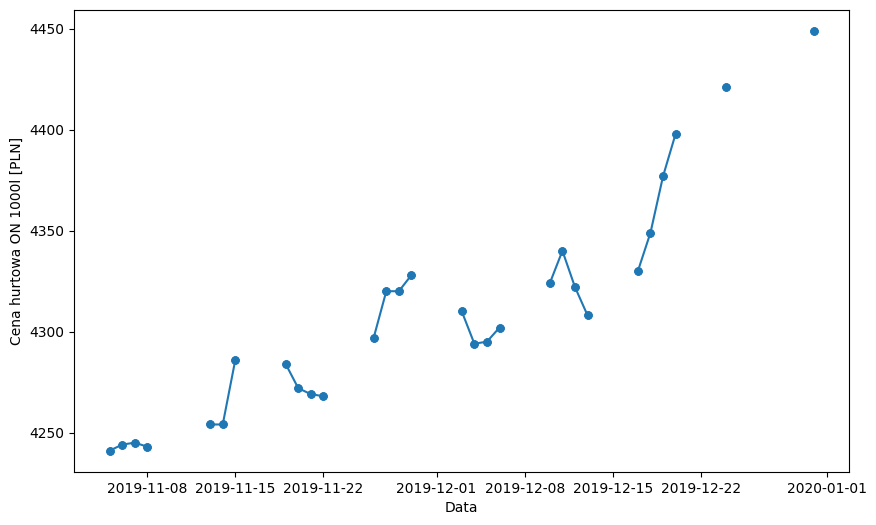

In [172]:
dane_okres1 = df[df['okres'] == 0]

plt.figure(figsize=(10, 6))
plt.plot(dane_okres1['Data'], dane_okres1['Cena hurtowa ON 1000l [PLN]'], label='Cena hurtowa ON 1000l [PLN]', marker = 'o', markersize=5)

plt.xlabel('Data')
plt.ylabel('Cena hurtowa ON 1000l [PLN]')

Aby przyjrzeć się dokładniej danym zostanie utworzony DF w którym będą dni i wartości Ceny hurtowej ON.

Pozwoli to na uniknięcie problemu związanego z 3 pomiarami dla jednego dnia oraz uprości dalsze operacje.

In [173]:
df_ceny = pd.DataFrame()
for date in dane_okres1['Data'].dt.date.unique():
    data = dane_okres1[dane_okres1['Data'].dt.date == date]
    df_ceny = pd.concat([df_ceny, data[['Data', 'Cena hurtowa ON 1000l [PLN]']].head(1)])
df_ceny.set_index('Data', inplace=True)
df_ceny.head()

,Cena hurtowa ON 1000l [PLN]
Data,
2019-11-04,NaN
2019-11-05,4241.0
2019-11-06,4244.0
2019-11-07,4245.0
2019-11-08,4243.0


In [174]:
# Jakie to dni konkretnie + dzień tygodnia + czy jest to dzień po dniu wolnym
df_braki = pd.DataFrame(df[df['Koszt dzienny [PLN]'].isnull()]['Data'].dt.date.value_counts()).reset_index()
df_braki.columns = ['Data', 'Dzień tygodnia']
days = {0: 'Poniedziałek', 1: 'Wtorek', 2: 'Środa', 3: 'Czwartek', 4: 'Piątek', 5: 'Sobota', 6: 'Niedziela'}
df_braki['Dzień tygodnia'] = df_braki['Data'].map(lambda x: days[x.weekday()])
df_braki['Czy dzień po dniu wolnym'] = df_braki['Data'] - pd.Timedelta(days=1)

df_braki['PrevDay'] = df_braki['Data'] - pd.Timedelta(days=1)
df_braki['Czy dzień po dniu wolnym'] = df_braki['PrevDay'].map(lambda x: True if x.weekday() in [5, 6] else False)
df_braki['Czy dzień po dniu wolnym'] = df_braki['PrevDay'].map(lambda x: True if x.weekday() in pl_holidays_dates.dt.weekday.values else False)
df_braki['Czy dzień po dniu wolnym'] = df_braki['Czy dzień po dniu wolnym'].map({True: 'Tak', False: 'Nie'})
df_braki = df_braki.drop(columns=['PrevDay'])

df_braki

,Data,Dzień tygodnia,Czy dzień po dniu wolnym
0,2019-11-04,Poniedziałek,Tak
1,2019-11-12,Wtorek,Tak
2,2019-11-18,Poniedziałek,Tak
3,2019-11-25,Poniedziałek,Tak
4,2019-12-02,Poniedziałek,Tak
5,2019-12-09,Poniedziałek,Tak
6,2019-12-16,Poniedziałek,Tak
7,2019-12-23,Poniedziałek,Tak
8,2019-12-27,Piątek,Tak
9,2019-12-30,Poniedziałek,Tak


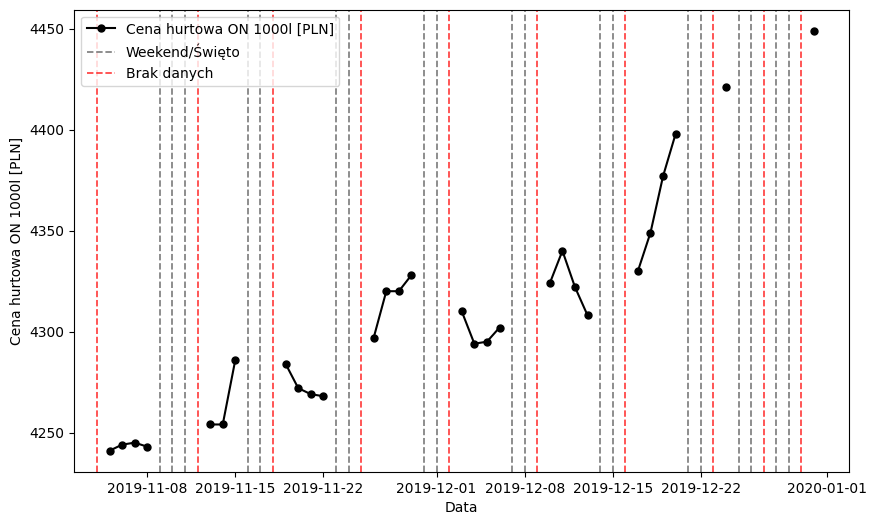

In [175]:
plt.figure(figsize=(10, 6))
plt.plot(df_ceny.index, df_ceny['Cena hurtowa ON 1000l [PLN]'], 'o-', markersize=5, color='black', label='Cena hurtowa ON 1000l [PLN]')
plt.xlabel('Data')
plt.ylabel('Cena hurtowa ON 1000l [PLN]')
plt.legend()

data_range = pd.date_range(start=df_ceny.index.min(), end=df_ceny.index.max())
for date in data_range:
    if date.dayofweek == 5 or date.dayofweek == 6 or date in pl_holidays_dates.values:
        plt.axvline(date, color='grey', linestyle='--', linewidth=1.25, label='Weekend/Święto')
        

for date in df_braki['Data']:
    plt.axvline(date, color='red', linestyle='--', linewidth=1.25, alpha=0.75, label='Brak danych')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

C:\Users\bugaj\AppData\Local\Temp\ipykernel_5784\2505408978.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ceny['Cena hurtowa ON 1000l [PLN]'] = df_ceny['Cena hurtowa ON 1000l [PLN]'].fillna(method='bfill')


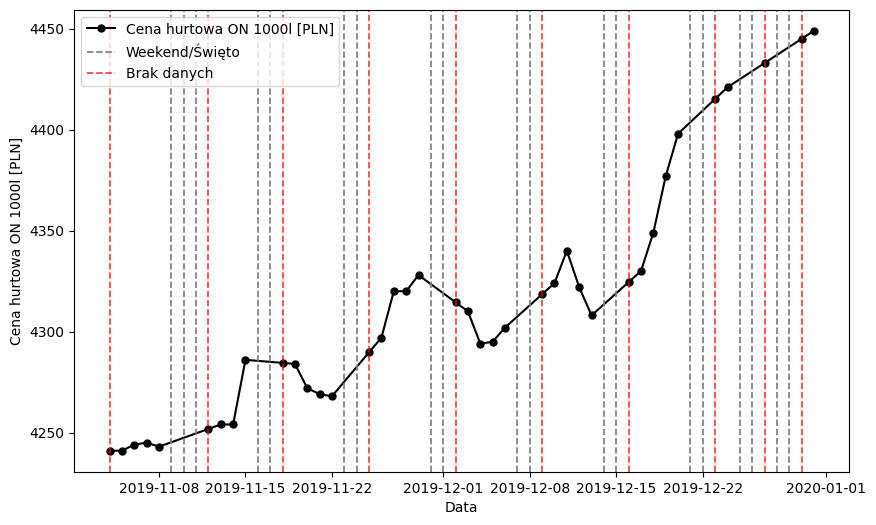

In [182]:
df_ceny['Cena hurtowa ON 1000l [PLN]'] = df_ceny['Cena hurtowa ON 1000l [PLN]'].interpolate(method='time')
df_ceny['Cena hurtowa ON 1000l [PLN]'] = df_ceny['Cena hurtowa ON 1000l [PLN]'].fillna(method='bfill')

plt.figure(figsize=(10, 6))
plt.plot(df_ceny.index, df_ceny['Cena hurtowa ON 1000l [PLN]'], 'o-', markersize=5, color='black', label='Cena hurtowa ON 1000l [PLN]')
plt.xlabel('Data')
plt.ylabel('Cena hurtowa ON 1000l [PLN]')
plt.legend()

data_range = pd.date_range(start=df_ceny.index.min(), end=df_ceny.index.max())
for date in data_range:
    if date.dayofweek == 5 or date.dayofweek == 6 or date in pl_holidays_dates.values:
        plt.axvline(date, color='grey', linestyle='--', linewidth=1.25, label='Weekend/Święto')

for date in df_braki['Data']:
    plt.axvline(date, color='red', linestyle='--', linewidth=1.25, alpha=0.75, label='Brak danych')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

In [177]:
df['Cena hurtowa ON 1000l [PLN]'] = df['Data'].map(df_ceny['Cena hurtowa ON 1000l [PLN]'])
df['Koszt dzienny [PLN]'] = df['Dzienne zużycie ON [l/8h]'] * df['Cena hurtowa ON 1000l [PLN]'] / 1000
df.head()

,Nr. Pomiaru,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa],okres,dzien_tygodnia
0,1,2019-11-04,5,13.2,2,8,15.0,48.0,4241.0,NaN,NaN,NaN,203.5680,10.25,2.85,10.25,995.0,0,Poniedziałek
1,2,2019-11-04,8,13.2,2,8,15.0,48.0,4241.0,NaN,NaN,NaN,203.5680,10.25,2.85,10.25,995.0,0,Poniedziałek
2,3,2019-11-04,15,13.2,2,8,15.0,48.0,4241.0,NaN,NaN,NaN,203.5680,10.25,2.85,10.25,995.0,0,Poniedziałek
3,4,2019-11-05,5,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.1752,7.00,1.94,8.00,999.5,0,Wtorek
4,5,2019-11-05,8,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.1752,7.00,1.94,8.00,999.5,0,Wtorek


W przypadku tego zbioru danych najlepszą zmienną do modelowania (TARGET) wydaje się być zmienna "Dzienne zużycie energii elektrycznej [kW/8h]". Jako zmienne objaśniające (FEATURES) najlepsze wydają się być zmienne które oznaczają fizyczne parametry pracy dźwigu i warunki pogodowe, czyli: "Ciężar ładunku [T]", "Długość wysięgnika [m]", "Odległość od osi [m]", "Wysokość podnoszenia [m]", "Prędkość wiatru [m/s]", "Temperatura [C]", "Ciśnienie [hPa]".

In [221]:
print("Kardynalność zmiennej 'Dzienne zużycie energii elektrycznej [kW/8h]':", df['Dzienne zużycie energii elektrycznej [kW/8h]'].nunique())
df['Dzienne zużycie energii elektrycznej [kW/8h]'].value_counts()

Kardynalność zmiennej 'Dzienne zużycie energii elektrycznej [kW/8h]': 3


Dzienne zużycie energii elektrycznej [kW/8h]
79.2    588
80.1    183
80.0     60
Name: count, dtype: int64

In [222]:
print("Kardynalność zmiennej 'Dzienne zużycie ON [l/8h]':", df['Dzienne zużycie ON [l/8h]'].nunique())
df['Dzienne zużycie ON [l/8h]'].value_counts()

Kardynalność zmiennej 'Dzienne zużycie ON [l/8h]': 5


Dzienne zużycie ON [l/8h]
48.0    42
47.2    33
48.8    33
46.4     6
49.6     3
Name: count, dtype: int64

In [225]:
for col in ["Ciężar ładunku [T]", "Długość wysięgnika [m]", "Odległość od osi [m]", "Wysokość podnoszenia [m]", "Prędkość wiatru [m/s]", "Temperatura [C]", "Ciśnienie [hPa]"]:
    print(f"Kardynalność zmiennej '{col}':", df[col].nunique())

Kardynalność zmiennej 'Ciężar ładunku [T]': 8
Kardynalność zmiennej 'Długość wysięgnika [m]': 14
Kardynalność zmiennej 'Odległość od osi [m]': 52
Kardynalność zmiennej 'Wysokość podnoszenia [m]': 42
Kardynalność zmiennej 'Prędkość wiatru [m/s]': 109
Kardynalność zmiennej 'Temperatura [C]': 63
Kardynalność zmiennej 'Ciśnienie [hPa]': 108


<Axes: >

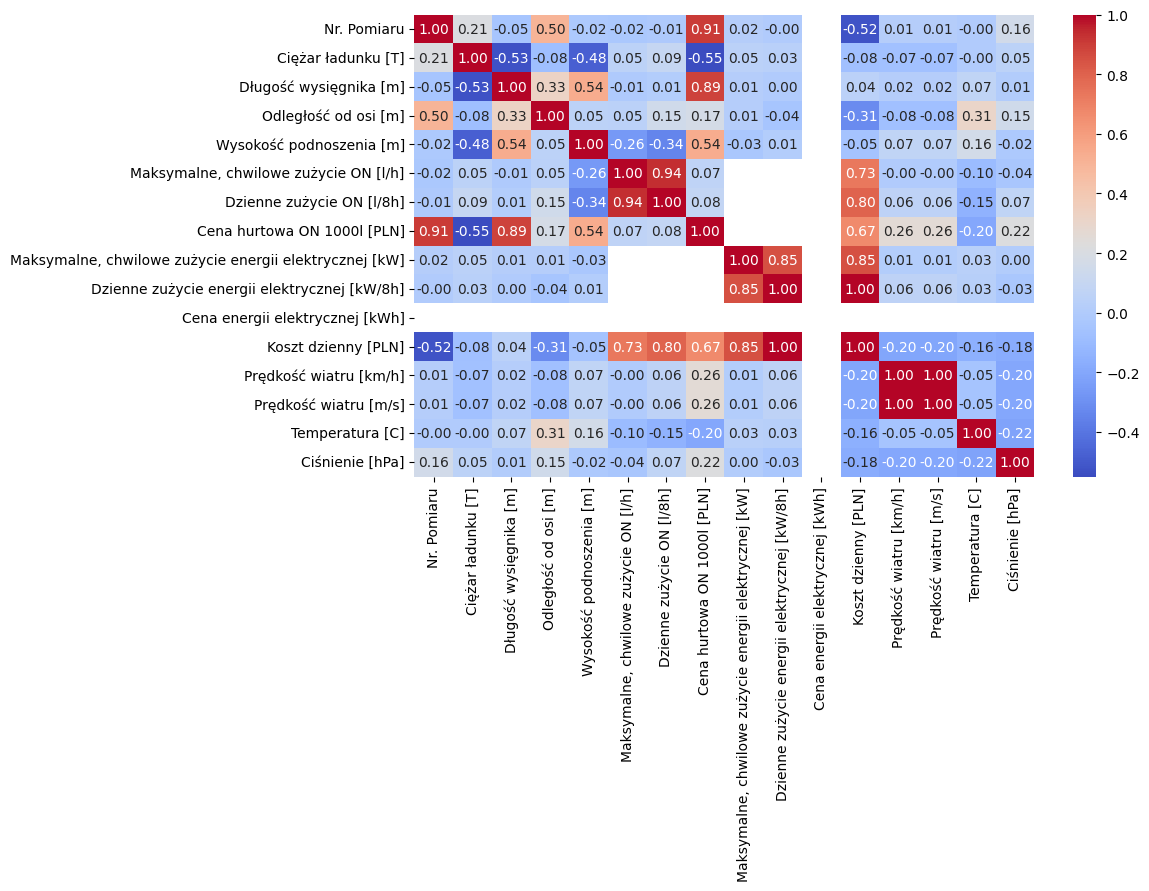

In [228]:
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")